In [79]:
import numpy as np
import matplotlib
from random import seed, shuffle, uniform
from math import ceil, sqrt
from functools import reduce

import os

# if running just for output don't halt to show plots
# plots will be saved in images folder
if __name__ == '__main__':
    matplotlib.use('Agg')
    no_interact = True
import matplotlib.pyplot as plt

IMG_FOLDER = "images/"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)

In [88]:
def sigmoid(X, Theta):
    
    return 1/(1+np.exp(-X@Theta))
def cost(guess, actual):
    with np.errstate(divide='ignore'):
        return 1/(guess.shape[0]) * np.sum(actual.T@np.log(guess) + (1-actual).T@np.log(1-guess))
def logistic_regression(X, Y, iterations=10000, learning_rate=.01):
    seed(0)
    
    Theta = np.array([uniform(-1,1) for _ in range(X.shape[1])]).T
    
    loss = []
    for i in range(iterations):
        # compute cost
        loss.append(-cost(sigmoid(X,Theta),Y))
    
        # If the abosulte value of the change in the loss
        # on the training data is less than 2^-23
        # skip the first iteration's check
        if(i > 0 and (np.isnan(loss[i]) or np.abs(loss[i] - loss[i-1]) < 2**-23)):
            break
    
        # Compute the gradient (partial l)/(partial theta)
        dl_dt = (learning_rate/X.shape[0]) * X.T@(Y - sigmoid(X, Theta))
    
        Theta += dl_dt
        
    return {"theta": Theta,
            "iterations": i + 1,
            "loss": loss}

def get_stats(guess, actual, threshold=.5):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(guess)):
        if(guess.item(i) > threshold):
            if(test_y.item(i) == 1):
                TP += 1
            else:
                FP += 1
        else:
            if(test_y.item(i) == 0):
                TN += 1
            else:
                FN += 1

    precision = TP/(TP+FP)
    recall = TP/(TP + FN)
    f_measure = (2*precision*recall)/(precision+recall)
    accuracy = 1/(TP+FP+TN+FN)*(TP+TN)
    return {"precision": precision,
            "recall": recall,
            "f-measure": f_measure,
            "accuracy": accuracy}

# Problem 2

In [93]:
from sklearn.datasets import load_iris
print("------------------\nProblem 2\n------------------\n")
iris = load_iris()
X_nonstandard = np.array(iris.data[:, :2])
Y = np.array((iris.target != 0) * 1).T

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

results = logistic_regression(X, Y, iterations=10000, learning_rate=.01)
Theta = results["theta"]

print("Iterations: {}".format(results["iterations"]))
for i in range(Theta.shape[0]):
    print("Theta_{}: {}".format(i, Theta.item(i)))
print("Final loss delta: {}".format(np.abs(results["loss"][-1] - results["loss"][-2])))
print("Line: y = {}x + {}".format(Theta.item(1)/-Theta.item(2), Theta.item(0)/-Theta.item(2)))

------------------
Problem 2
------------------

Iterations: 10000
Theta_0: 2.1680680579887635
Theta_1: 3.8023159585445083
Theta_2: -2.5665004964170794
Final loss delta: 2.449116088036607e-06
Line: y = 1.4815177179403116x + 0.8447565317113552


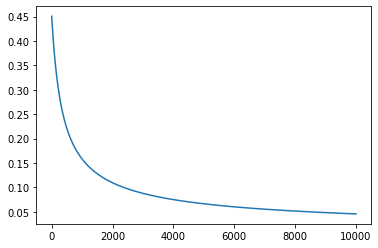

In [94]:
# Graphing section taken from https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
fig = plt.figure()
xx, yy = np.mgrid[-2:3.5:.01, -2:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = np.insert(grid,0,1,axis=1)
probs = sigmoid(grid,Theta).reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 3.5), ylim=(-2, 3.5),
       xlabel="$X_1$", ylabel="$X_2$")


plt.savefig(IMG_FOLDER + "Q2-threshold.png")
if(not no_interact):
    plt.show()
plt.close()
plt.plot(range(len(results["loss"])), results["loss"])
plt.savefig(IMG_FOLDER + "Q2-cost-vs-iterations.png")
if(not no_interact):
    plt.show()

Theta_0: 47.81414622348973
Theta_1: 67.26895117169423
Theta_2: -30.035073039983903


<Figure size 432x288 with 0 Axes>

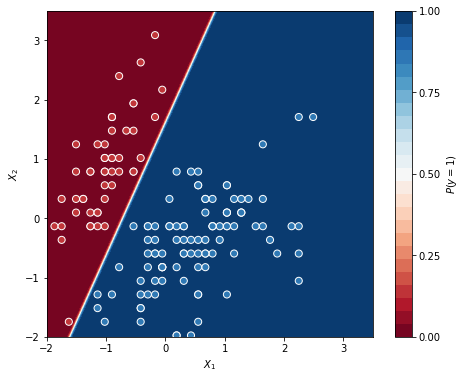

In [95]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
lgr.fit(X[:,1:],Y)
print("Theta_0: {}\nTheta_1: {}\nTheta_2: {}".format(lgr.intercept_[0], lgr.coef_.item(0),lgr.coef_.item(1)))
fig = plt.figure()
xx, yy = np.mgrid[-2:3.5:.01, -2:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgr.predict_proba(grid)[:,1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 3.5), ylim=(-2, 3.5),
       xlabel="$X_1$", ylabel="$X_2$")


plt.savefig(IMG_FOLDER + "Q2-built-in-threshold.png")
if(not no_interact):
    plt.show()

# Problem 3

In [96]:
print("------------------\nProblem 3\n------------------\n")
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0, ddof=1)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

split_location = ceil(data.shape[0]*2/3)
training_data = data[0:split_location, :]
test_data = data[split_location:]

training_x = training_data[:,0:-1]

X_mean = np.mean(training_x, axis=0)
X_std  = np.std(training_x, axis=0, ddof=1)
X_nob  = (training_x - X_mean)/X_std
    
training_x = np.insert(X_nob, 0, 1,axis=1)

training_y = training_data[:, -1]

test_x = test_data[:,0:-1]

X_mean = np.mean(test_x, axis=0)
X_std  = np.std(test_x, axis=0, ddof=1)
X_nob  = (test_x - X_mean)/X_std
    
test_x = np.insert(X_nob, 0, 1,axis=1)
test_y = test_data[:, -1]

results = logistic_regression(training_x, training_y, iterations=1500, learning_rate=.01)

Theta = results["theta"]

guess = sigmoid(test_x, Theta)

------------------
Problem 3
------------------



/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Threshold: .5
{'precision': 0.6179245283018868, 'recall': 1.0, 'f-measure': 0.7638483965014577, 'accuracy': 0.6829745596868884}
Threshold: .9
{'precision': 0.7845659163987139, 'recall': 0.9312977099236641, 'f-measure': 0.8516579406631762, 'accuracy': 0.8336594911937377}


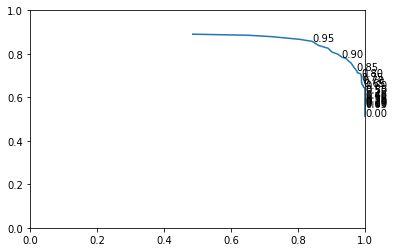

In [116]:
stats = get_stats(guess, test_y, threshold=.5)
print("Threshold: .5\n{}".format(stats))
thresholds = np.linspace(0,.99,100)
precisions = []
recalls    = []
for t in thresholds:
    s = get_stats(guess, test_y, threshold=t)
    precisions.append(s["precision"])
    recalls.append(s["recall"])
    
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(recalls, precisions)
for i in range(0, len(thresholds), 5):
    plt.text(recalls[i],precisions[i], "{:.02f}".format(thresholds[i]))
stats = get_stats(guess, test_y, threshold=.90)
print("Threshold: .9\n{}".format(stats))
    
plt.savefig(IMG_FOLDER + "Q3-precision-vs-recall.png")
if(not no_interact):
    plt.show()

# Problem 4

In [83]:
print("------------------\nProblem 4\n------------------\n")
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0, ddof=1)
X_nob  = (X_nonstandard - X_mean)/X_std
    
split_location = ceil(data.shape[0]*2/3)
training_data = data[0:split_location, :]
test_data = data[split_location:]

training_x = training_data[:,0:-1]

X_mean = np.mean(training_x, axis=0)
X_std  = np.std(training_x, axis=0, ddof=1)
X_nob  = (training_x - X_mean)/X_std
    
training_y = training_data[:, -1]

test_x = test_data[:,0:-1]

X_mean = np.mean(test_x, axis=0)
X_std  = np.std(test_x, axis=0, ddof=1)
X_nob  = (test_x - X_mean)/X_std
    
test_y = test_data[:, -1]


training_x_true  = training_x[training_y == 1, :]
training_x_false = training_x[training_y == 0, :]

------------------
Problem 4
------------------



In [84]:
prob_true    = training_x_true.shape[0] / training_x.shape[0]
means_true   = []
stdevs_true  = []
prob_false   = 1 - prob_true
means_false  = []
stdevs_false = []

for i in range(training_x.shape[1]):
    means_true.append(np.mean(training_x_true[:,i]))
    stdevs_true.append(np.std(training_x_true[:,i], ddof=1))
    means_false.append(np.mean(training_x_false[:,i]))
    stdevs_false.append(np.std(training_x_false[:,i], ddof=1))
    
means_true   = np.array(means_true)
stdevs_true  = np.array(stdevs_true)
means_false  = np.array(means_false)
stdevs_false = np.array(stdevs_false)
predictions = [] 

def gaussian(mean, stdev, x):
    return 1/(stdev*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*stdev**2))
    
with np.errstate(divide='ignore'):
    # if stdevs are zero then the feature is always a certain value for a class
    # messes with divisions so set so epsilon
    stdevs_true[stdevs_true==0] = 2**-23
    stdevs_false[stdevs_false==0] = 2**-23
    for i in range(test_x.shape[0]):
        guess_true  = gaussian(means_true, stdevs_true, test_x[i,:])
        guess_true[np.isnan(guess_true)] = 2**-23 
        guess_true[guess_true == 0] = 2**-23
        guess_true = np.log(prob_true) + np.sum(np.log(guess_true))
        
        guess_false = gaussian(means_false, stdevs_false, test_x[i,:])
        guess_false[np.isnan(guess_false)] = 2**-23 
        guess_false[guess_false == 0] = 2**-23 
        guess_false = np.log(prob_false) + np.sum(np.log(guess_false))
        if(guess_true>guess_false):
            predictions.append(1)
        else:
            predictions.append(0)
predictions = np.array(predictions)
stats = get_stats(predictions,test_y) 
print(stats)

{'precision': 0.6761061946902654, 'recall': 0.9720101781170484, 'f-measure': 0.7974947807933194, 'accuracy': 0.7469015003261579}
